In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.ensemble import RandomForestClassifier

In [3]:
df_gar = pd.read_csv("problem_2_garfield_activity.csv")
df_gar

,8AM,9AM,10AM,11AM,Noon,1PM,2PM,3PM,4PM,5PM,Commute,DayOfWeek,WatchTV
0,Coffee,6,7,2,Sandwich,10,8,4,Tea,10,Long,Mon,Yes
1,Doughnut,4,5,3,Lenthils,1,1,3,PingPong,7,Short,Tue,No
2,Coffee,7,4,4,Taco,10,4,3,PingPong,7,Short,Wed,No
3,Coffee,1,1,8,Sandwich,10,7,6,PingPong,8,Short,Thu,Yes
4,Doughnut,8,6,7,Sandwich,7,6,8,Tea,8,Long,Fri,Yes
5,Sandwich,10,2,4,Lenthils,1,3,9,Coffee,9,Short,Sat,No
6,Doughnut,6,10,7,Lenthils,1,0,6,Coffee,8,Short,Mon,No
7,Coffee,10,6,10,Taco,5,2,0,Tea,8,Short,Tue,No
8,Sandwich,8,5,9,Lenthils,9,7,5,PingPong,3,Short,Wed,No
9,Coffee,4,7,2,Taco,0,8,2,Workout,10,Short,Thu,Yes


In [62]:
df_gar_train = df_gar[df_gar.WatchTV.notnull()].copy()
df_gar_train

,8AM,9AM,10AM,11AM,Noon,1PM,2PM,3PM,4PM,5PM,Commute,DayOfWeek,WatchTV
0,Coffee,6,7,2,Sandwich,10,8,4,Tea,10,Long,Mon,Yes
1,Doughnut,4,5,3,Lenthils,1,1,3,PingPong,7,Short,Tue,No
2,Coffee,7,4,4,Taco,10,4,3,PingPong,7,Short,Wed,No
3,Coffee,1,1,8,Sandwich,10,7,6,PingPong,8,Short,Thu,Yes
4,Doughnut,8,6,7,Sandwich,7,6,8,Tea,8,Long,Fri,Yes
5,Sandwich,10,2,4,Lenthils,1,3,9,Coffee,9,Short,Sat,No
6,Doughnut,6,10,7,Lenthils,1,0,6,Coffee,8,Short,Mon,No
7,Coffee,10,6,10,Taco,5,2,0,Tea,8,Short,Tue,No
8,Sandwich,8,5,9,Lenthils,9,7,5,PingPong,3,Short,Wed,No
9,Coffee,4,7,2,Taco,0,8,2,Workout,10,Short,Thu,Yes


In [61]:
df_gar_test = df_gar[df_gar.WatchTV.isnull()].copy()
df_gar_test

,8AM,9AM,10AM,11AM,Noon,1PM,2PM,3PM,4PM,5PM,Commute,DayOfWeek,WatchTV
19,Coffee,1,4,5,Sandwich,4,4,9,Workout,4,Short,Tue,NaN
20,Coffee,2,2,5,Lenthils,3,2,3,PingPong,4,Long,Wed,NaN


In [23]:
n_l = np.array([9,10,11,1,2,3,5],dtype=str)
var_numeric = [i for i in df_gar.columns for j in n_l if j in i]
var_numeric

['9AM', '10AM', '10AM', '11AM', '11AM', '1PM', '2PM', '3PM', '5PM']

In [24]:
var_cat = ["8AM","Noon","4PM","Commute","DayOfWeek"]
var_cat

['8AM', 'Noon', '4PM', 'Commute', 'DayOfWeek']

In [41]:
df_gar.WatchTV.value_counts()

Yes    10
No      9
Name: WatchTV, dtype: int64

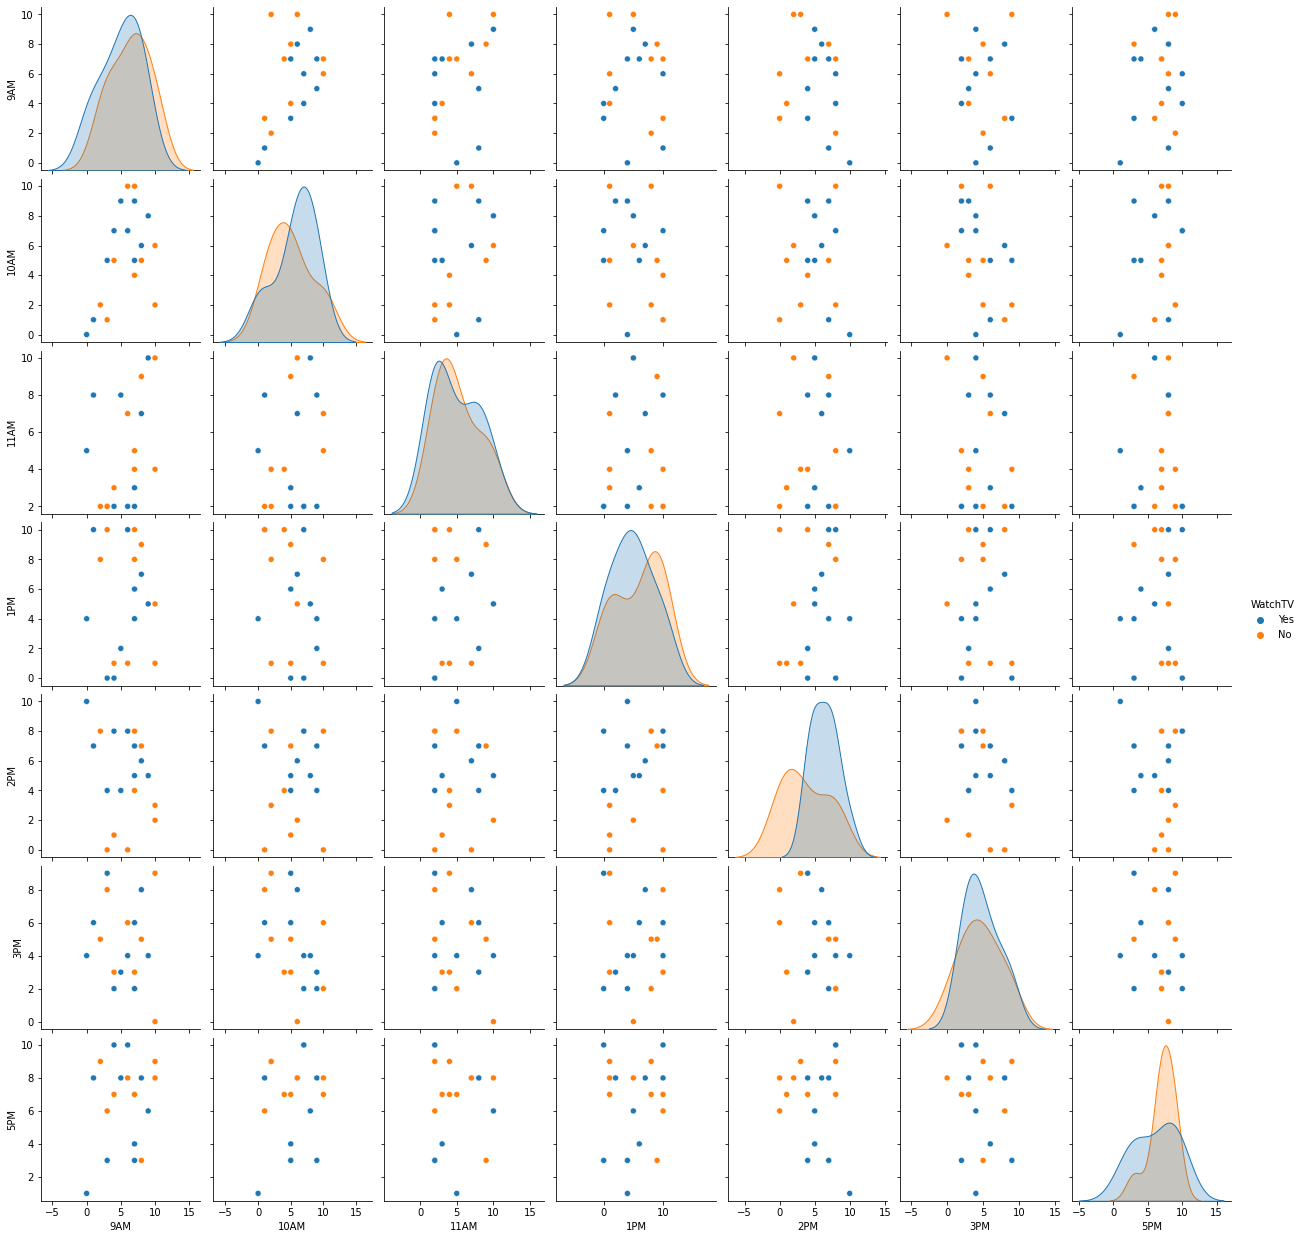

In [67]:
sns.pairplot(df_gar_train, hue="WatchTV")

In [71]:
# Using random forest for feature importance
forest = RandomForestClassifier(random_state=0)
features = var_cat + var_numeric
target = "WatchTV"
forest.fit(df_gar_train[var_numeric],df_gar_train[target])

RandomForestClassifier(random_state=0)

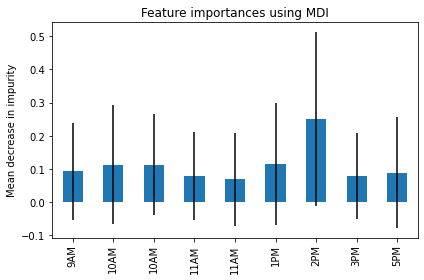

In [75]:
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=var_numeric)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [76]:
std

array([0.14547518, 0.17828475, 0.15218671, 0.13253738, 0.14090837,
       0.18373342, 0.26189188, 0.12955874, 0.1660098 ])

In [79]:
# Numeric leading indicators in descending order of importance
forest_importances.sort_values(ascending=False)

2PM     0.249807
1PM     0.115391
10AM    0.113405
10AM    0.112468
9AM     0.093354
5PM     0.088999
11AM    0.079083
3PM     0.078924
11AM    0.068569
dtype: float64

In [152]:
# Encode categorical variables 
d = defaultdict(LabelEncoder)
df_gar_train[var_cat + [target]] = df_gar_train[var_cat + [target]].apply(lambda x: d[x.name].fit_transform(x))

In [153]:
# Labels for encoder
for i in d:
    print(i , {i:j for i,j in enumerate(d[i].classes_)})

8AM {0: 0, 1: 1, 2: 2}
Noon {0: 0, 1: 1, 2: 2}
4PM {0: 0, 1: 1, 2: 2, 3: 3}
Commute {0: 0, 1: 1}
DayOfWeek {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
WatchTV {0: 0, 1: 1}


In [161]:
# Categorical leading indicators in descending order of mutual information
pd.Series(mutual_info_classif(df_gar_train[var_cat],df_gar_train[target]),index=var_cat).sort_values(ascending=False)

Noon         0.538070
Commute      0.169043
DayOfWeek    0.034812
8AM          0.000000
4PM          0.000000
dtype: float64

In [114]:
# Confirming above results by inspection
for i in var_cat:
    print(df_gar_train.groupby([target,i]).size(),end="\n\n")

WatchTV  8AM     
No       Coffee      4
         Doughnut    2
         Sandwich    3
Yes      Coffee      4
         Doughnut    4
         Sandwich    2
dtype: int64

WatchTV  Noon    
No       Lenthils    5
         Taco        4
Yes      Sandwich    7
         Taco        3
dtype: int64

WatchTV  4PM     
No       Coffee      2
         PingPong    5
         Tea         1
         Workout     1
Yes      Coffee      2
         PingPong    2
         Tea         3
         Workout     3
dtype: int64

WatchTV  Commute
No       Short      9
Yes      Long       5
         Short      5
dtype: int64

WatchTV  DayOfWeek
No       Mon          3
         Sat          1
         Thu          1
         Tue          2
         Wed          2
Yes      Fri          3
         Mon          1
         Sat          2
         Thu          2
         Tue          1
         Wed          1
dtype: int64

